<a href="https://colab.research.google.com/github/collinscolour/GoMyCodeCheckPoint/blob/main/UnsupervisedLearningClustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this checkpoint, we are going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link


Columns explanation :

CUST_ID: Identification of Credit Card holder (Categorical)
BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
PURCHASES: Amount of purchases made from account
CASH_ADVANCE: Cash in advance given by the user
CREDIT_LIMIT: Limit of Credit Card for user
PAYMENTS: Amount of Payment done by user
Instructions
Import you data and perform basic data exploration phase
Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
Perform partitional clustering using the K-means algorithm. Then, plot the clusters
Find the best k value and plot the clusters again.
Interpret the results

In [20]:
#import
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px

In [7]:
data = pd.read_csv("Credit_card_dataset.csv")
print(data.head())

  CUST_ID  BALANCE_FREQUENCY  PURCHASES     PAYMENTS  CREDIT_LIMIT  \
0  C10001           0.818182      95.40   201.802084        1000.0   
1  C10002           0.909091       0.00  4103.032597        7000.0   
2  C10003           1.000000     773.17   622.066742        7500.0   
3  C10004           0.636364    1499.00     0.000000        7500.0   
4  C10005           1.000000      16.00   678.334763        1200.0   

   CASH_ADVANCE  
0      0.000000  
1   6442.945483  
2      0.000000  
3    205.788017  
4      0.000000  


In [8]:
# Clean the data
# Check for missing values
data.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [10]:
data.dropna(inplace=True)
data.duplicated().sum()


0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8949 non-null   object 
 1   BALANCE_FREQUENCY  8949 non-null   float64
 2   PURCHASES          8949 non-null   float64
 3   PAYMENTS           8949 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8949 non-null   float64
dtypes: float64(5), object(1)
memory usage: 489.4+ KB


In [12]:
data.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,0.877350,1003.316936,1733.336511,4494.449450,978.959616
std,0.236798,2136.727848,2895.168146,3638.815725,2097.264344
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.800000,383.282850,1600.000000,0.000000
50%,1.000000,361.490000,857.062706,3000.000000,0.000000
75%,1.000000,1110.170000,1901.279320,6500.000000,1113.868654
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


In [15]:
#encoding categorical features using LabelEncoder
encoder = LabelEncoder()
data["CUST_ID"] = encoder.fit_transform(data["CUST_ID"])
data

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0,0.818182,95.40,201.802084,1000.0,0.000000
1,1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,2,1.000000,773.17,622.066742,7500.0,0.000000
3,3,0.636364,1499.00,0.000000,7500.0,205.788017
4,4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,8944,1.000000,291.12,325.594462,1000.0,0.000000
8946,8945,1.000000,300.00,275.861322,1000.0,0.000000
8947,8946,0.833333,144.40,81.270775,1000.0,0.000000
8948,8947,0.833333,0.00,52.549959,500.0,36.558778


In [29]:
fig= px.histogram(data, y="PURCHASES", x= "CUST_ID", title="Credit_card_dataset.csv")
fig.show()

In [16]:
 # Normalize numerical features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[["PURCHASES", "CREDIT_LIMIT"]])
scaled_features


array([[-0.4249337 , -0.96037969],
       [-0.4695839 ,  0.68860056],
       [-0.10771601,  0.82601558],
       ...,
       [-0.40200016, -0.96037969],
       [-0.4695839 , -1.09779471],
       [ 0.0420915 , -0.90541368]])

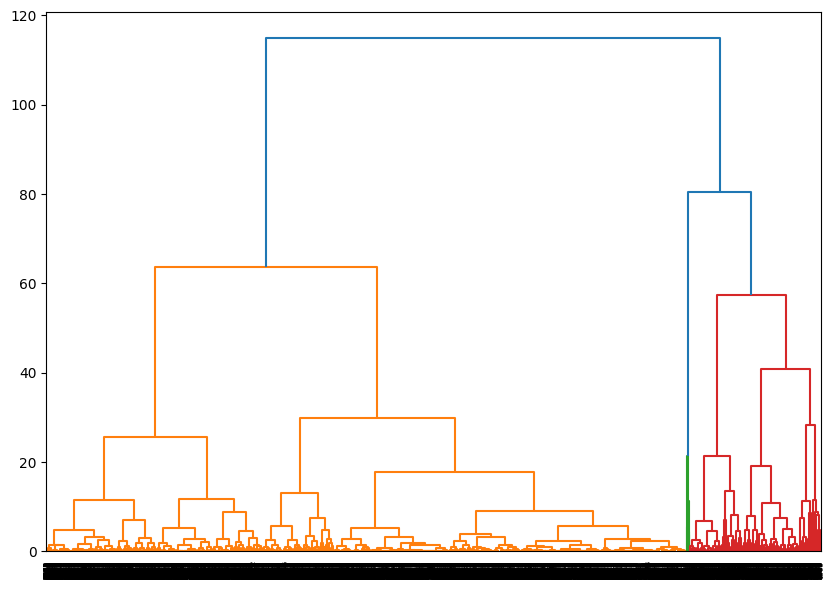

In [17]:
# Linkage matrix
linked = linkage(scaled_features, method="ward")

  # Dendrogram visualization
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation="top")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

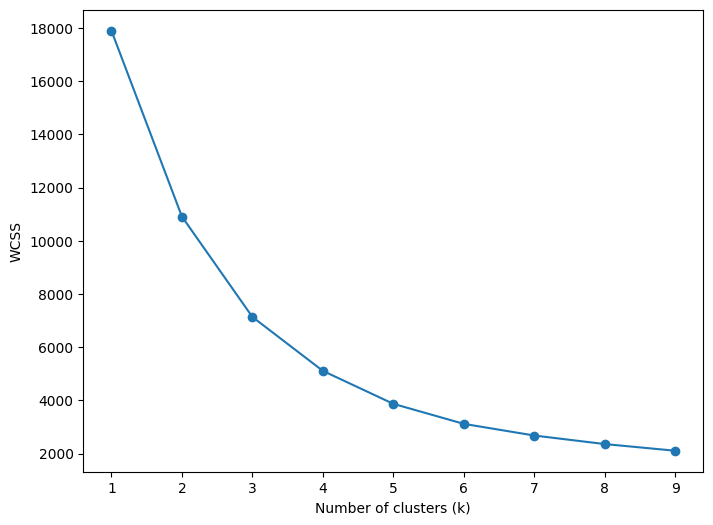

In [4]:


# Elbow method to find the optimal number of clusters
k_range = range(1, 10)
wcss = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, wcss, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


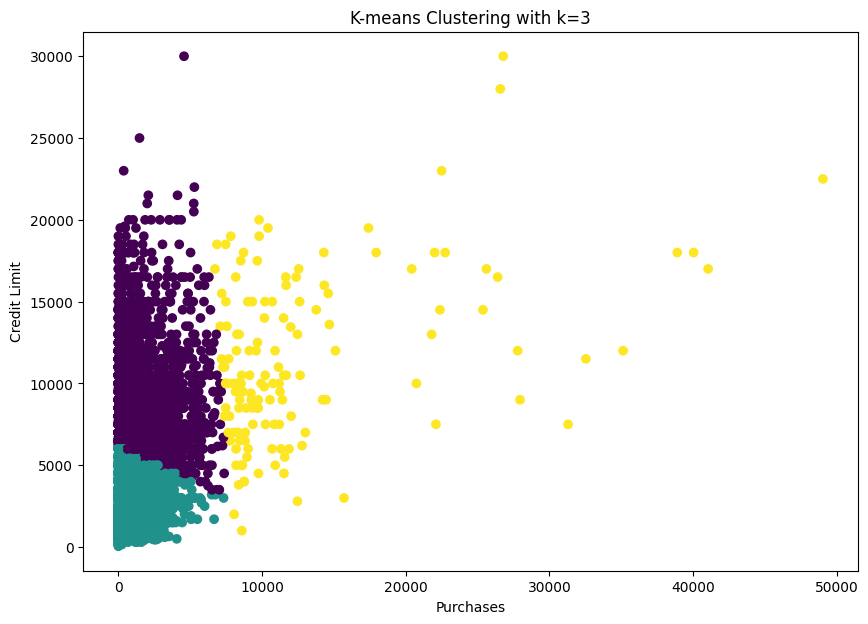

In [5]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_features)

# Add cluster labels to the data
data["cluster"] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(10, 7))
plt.scatter(
    data["PURCHASES"], data["CREDIT_LIMIT"], c=data["cluster"], cmap="viridis"
)
plt.xlabel("Purchases")
plt.ylabel("Credit Limit")
plt.title("K-means Clustering with k=3")
plt.show()

The dendrogram shows several potential cluster formations with different levels of granularity.
Identifying the optimal number of clusters requires further analysis and business considerations.*italicized text*